In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('dataset/housing.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

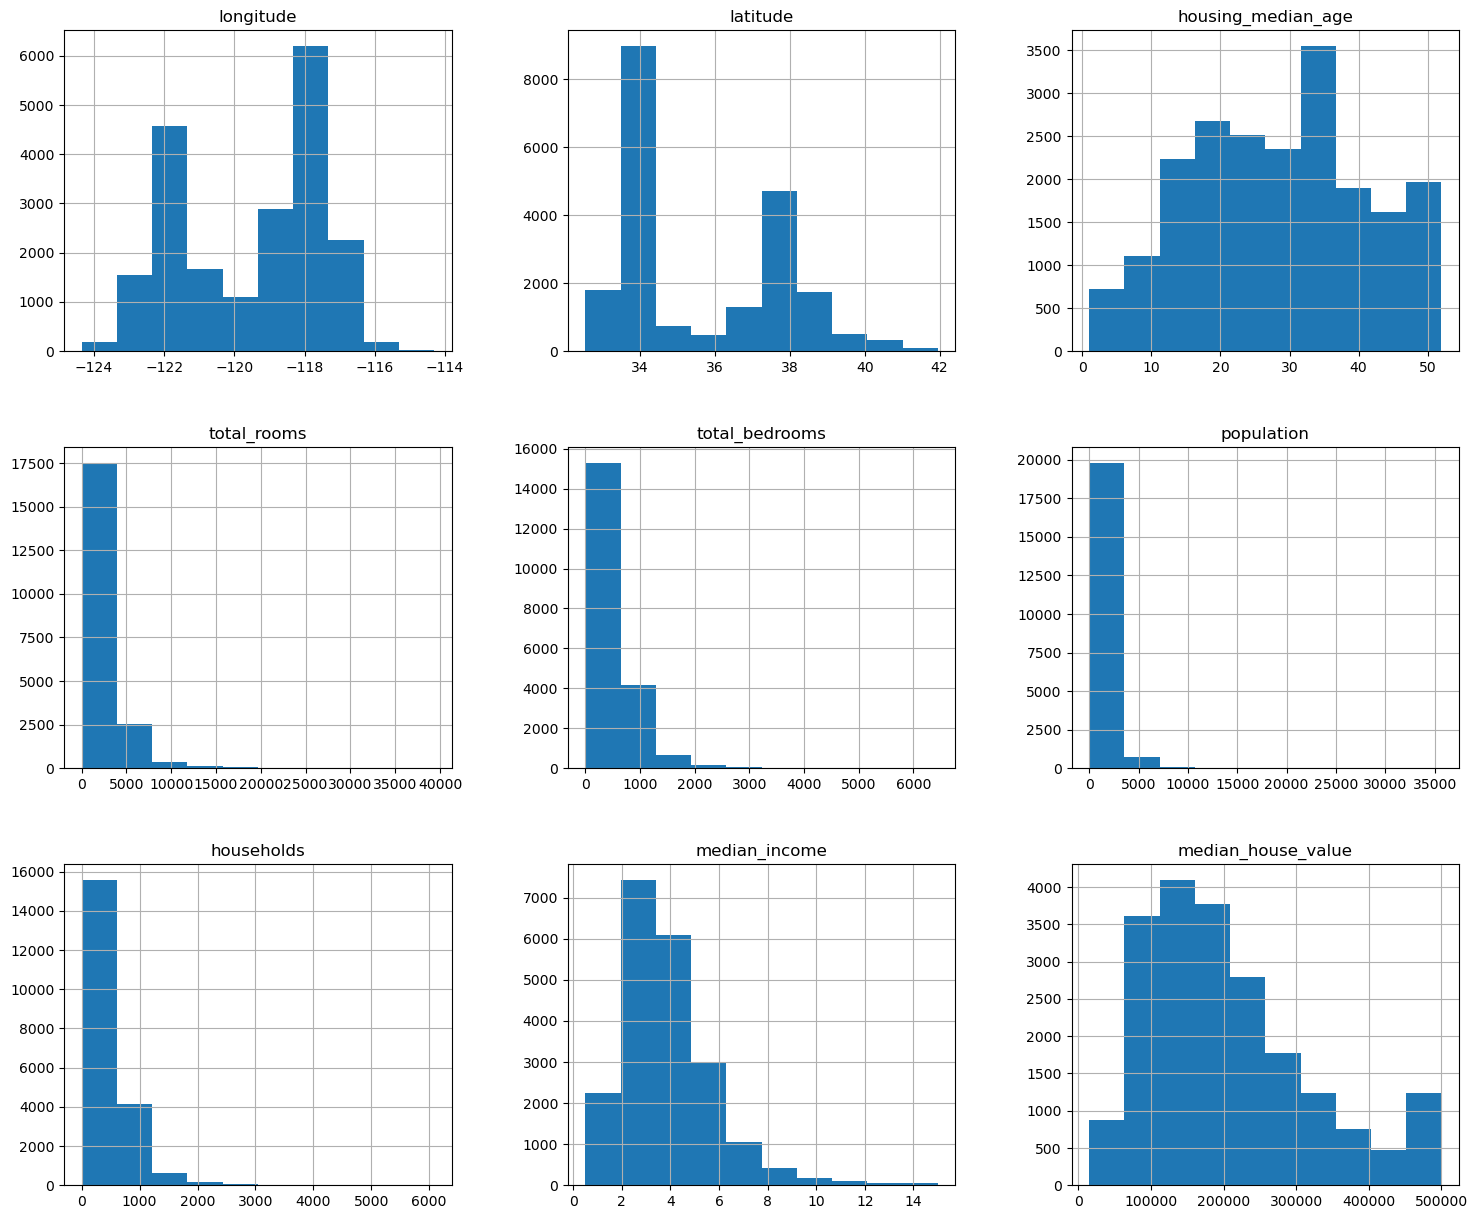

In [5]:
#Khám phá dữ liệu
data.hist(figsize=(18,15))

In [6]:
#Xử lý dữ liệu

In [7]:
data.drop(columns = ["population", "households"], inplace=True) 

In [8]:
data.dropna(inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   median_income       20433 non-null  float64
 6   median_house_value  20433 non-null  float64
 7   ocean_proximity     20433 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.4+ MB


In [10]:
#Xử lý feature "QUẬN HUYỆN" để có thể fit dữ liệu vào model
data = pd.get_dummies(data, columns=['ocean_proximity'], prefix='',prefix_sep='')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   median_income       20433 non-null  float64
 6   median_house_value  20433 non-null  float64
 7   <1H OCEAN           20433 non-null  bool   
 8   INLAND              20433 non-null  bool   
 9   ISLAND              20433 non-null  bool   
 10  NEAR BAY            20433 non-null  bool   
 11  NEAR OCEAN          20433 non-null  bool   
dtypes: bool(5), float64(7)
memory usage: 1.3 MB


In [12]:
from sklearn.model_selection import train_test_split

X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [15]:
train_data = X.join(y)

<Axes: >

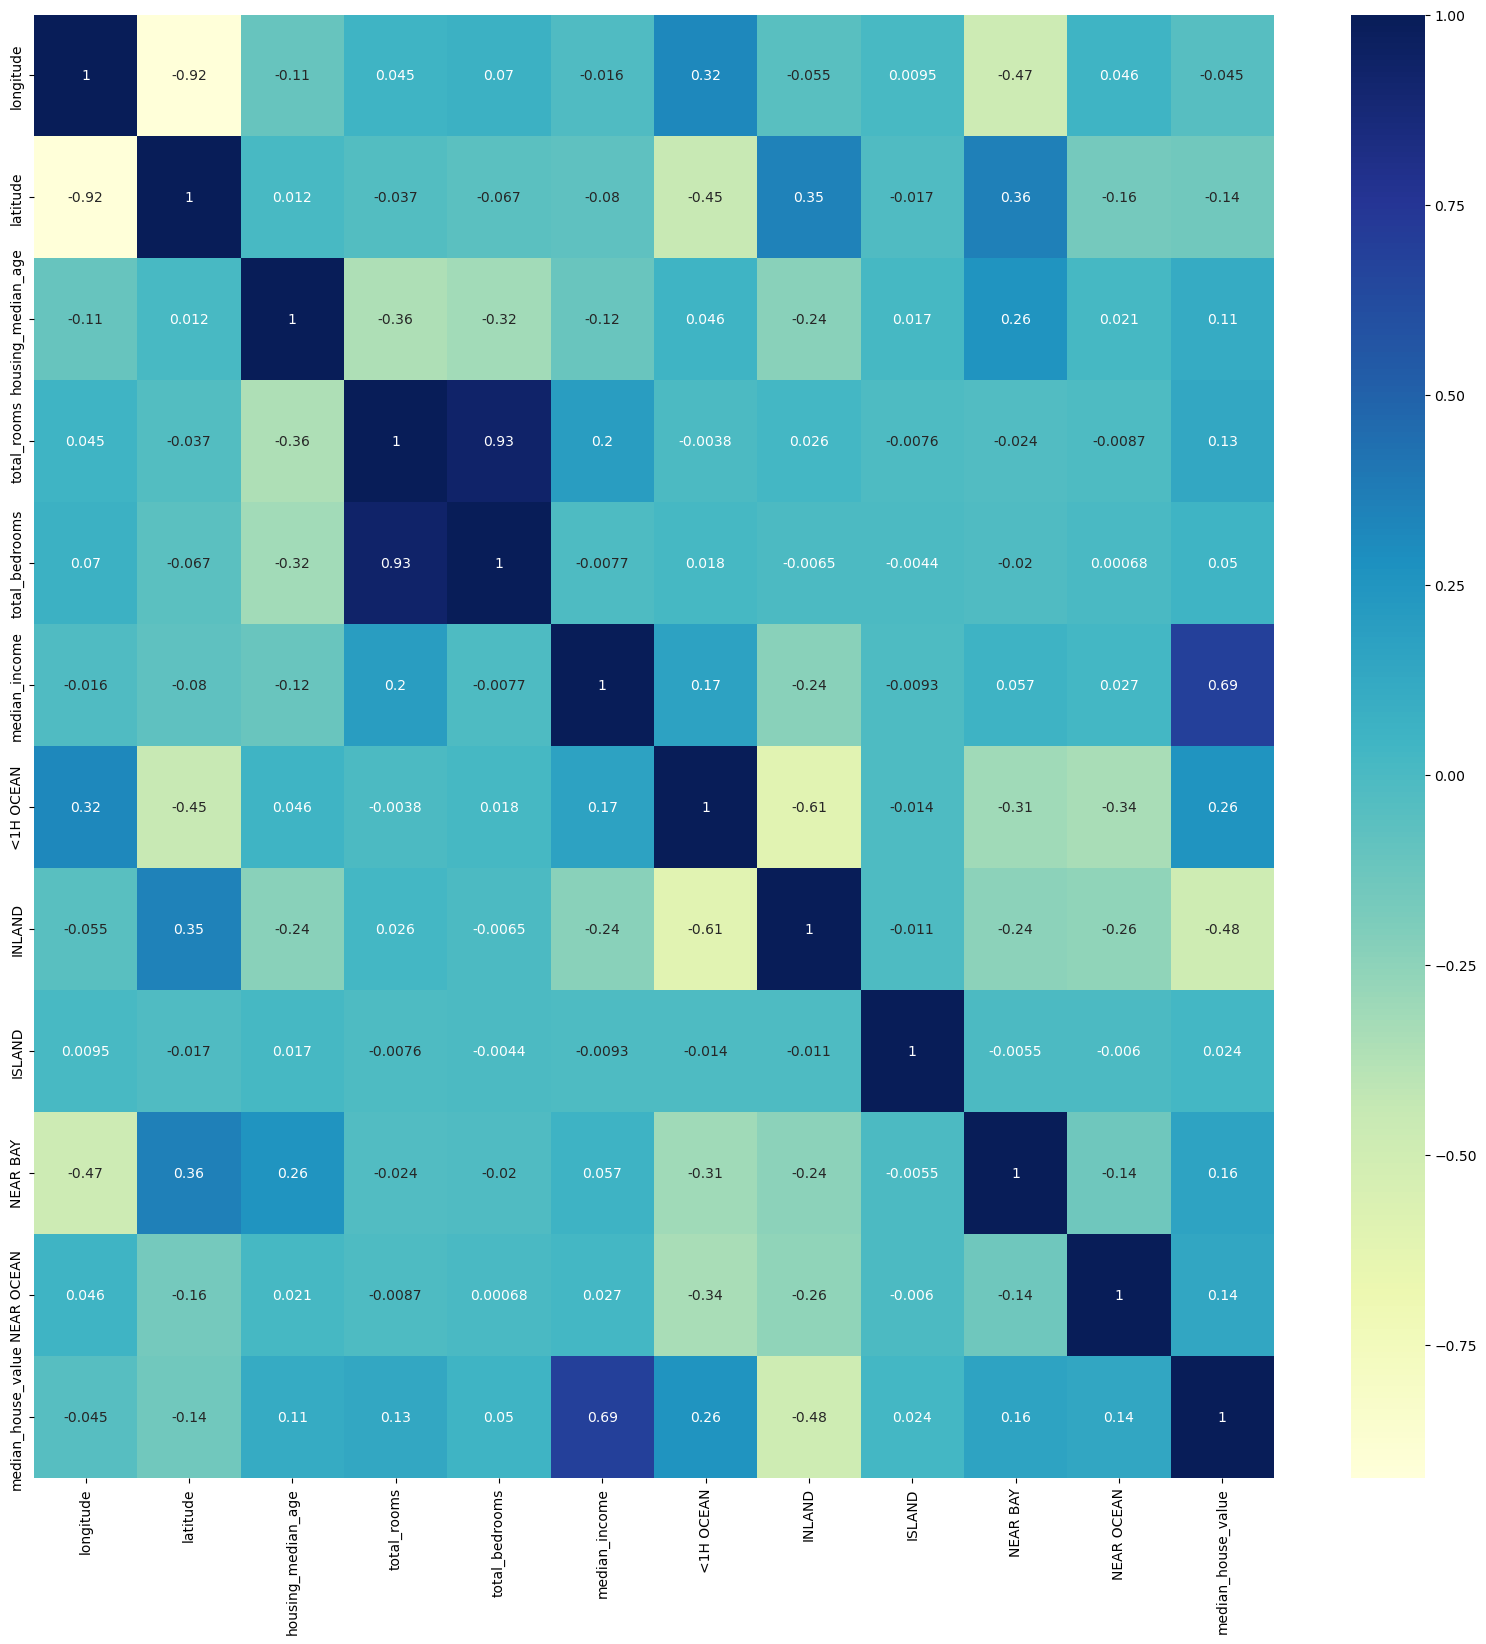

In [16]:
plt.figure(figsize=(20,19))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')
#Feature càng tiến đến 1 thì càng ảnh hưởng đến giá nhà

In [17]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100,random_state=42)
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
forest.score(X_test, y_test)

0.8228246796543004

In [24]:
#Sample for predict
X_sample =[
    "longtitude" = -117.26
    "latitude" = 36.02
    "housing_median_age" = 40.0
    "total_rooms" = 200.0
    "total_bedrooms" = 175
    "median_income" = 5.7800
    "ocean_proximity" = 
]

SyntaxError: incomplete input (769807456.py, line 2)

In [19]:
# Dự đoán trên tập dữ liệu X_test
forest.predict(X_test)

array([214531.01, 151359.  , 195194.  , ...,  84667.  , 107547.  ,
       120732.  ])